## Chart parsing

**chart parsing** uses dynamic programming to derive the parses of an ambiguous sentence more efficiently.

Algorithm:

	
Until no new edges are added:

 For each chart rule R:
 
   Apply R to any applicable edges in the chart.

   Return any complete parses in the chart

In [ ]:
# why chart parsing?
grammar = CFG.fromstring("""
... S -> NP V NP
... NP -> NP Sbar
... Sbar -> NP V
... NP -> 'fish'
... V -> 'fish'
... """)
cp = nltk.ChartParser(grammar)
for tree in cp.parse("fish fish fish".split()): # fish fish
  print(tree)

(S (NP fish) (V fish) (NP fish))


In [ ]:
# in the below grammar, the VP 'opened the box on the floor' can be analysed in two ways, depending on where the PP is attached
grammar = CFG.fromstring("""
... S -> NP VP
... PP -> P NP
... NP -> Det N | NP PP
... VP -> V NP | VP PP
... Det -> 'the'
... N -> 'kids' | 'box' | 'floor'
... V -> 'opened'
... P -> 'on'
... """)
cp = nltk.ChartParser(grammar)
for tree in cp.parse("the kids opened the box on the floor".split()): 
  print(tree)

(S
  (NP (Det the) (N kids))
  (VP
    (VP (V opened) (NP (Det the) (N box)))
    (PP (P on) (NP (Det the) (N floor)))))
(S
  (NP (Det the) (N kids))
  (VP
    (V opened)
    (NP (NP (Det the) (N box)) (PP (P on) (NP (Det the) (N floor))))))


Dynamic programming allows us to build the PP *on the floor* just once. 

In [ ]:
# bottom-up chart parsing
nltk.parse.chart.demo(2, trace=0, sent='I saw John with a dog', numparses=2)

* Sentence:
I saw John with a dog
['I', 'saw', 'John', 'with', 'a', 'dog']

* Strategy: Bottom-up

Nr edges in chart: 53
(S
  (NP I)
  (VP (VP (Verb saw) (NP John)) (PP with (NP (Det a) (Noun dog)))))
(S
  (NP I)
  (VP (Verb saw) (NP (NP John) (PP with (NP (Det a) (Noun dog))))))

* Parsing times

Bottom-up parser:  0.006sec


In [ ]:
# top-down chart parsing
nltk.parse.chart.demo(1, trace=0, sent='I saw John with a dog', numparses=2)

* Sentence:
I saw John with a dog
['I', 'saw', 'John', 'with', 'a', 'dog']

* Strategy: Top-down

Nr edges in chart: 48
(S
  (NP I)
  (VP (Verb saw) (NP (NP John) (PP with (NP (Det a) (Noun dog))))))
(S
  (NP I)
  (VP (VP (Verb saw) (NP John)) (PP with (NP (Det a) (Noun dog)))))

* Parsing times

Top-down parser:  0.002sec


In [ ]:
from nltk import CFG
cgrammar = CFG.fromstring('''
  NP  -> NNS | JJ NNS | NP CC NP
  NNS -> "men" | "women" | "children" | NNS CC NNS
  JJ  -> "old" | "young"
  CC  -> "and" | "or"
  ''')

In [ ]:
cp = ChartParser(cgrammar)

In [ ]:
sent = 'old men and women'.split()
for tree in cp.parse(sent):
  print(tree)

(NP (JJ old) (NNS (NNS men) (CC and) (NNS women)))
(NP (NP (JJ old) (NNS men)) (CC and) (NP (NNS women)))


In [ ]:
cp = ChartParser(cgrammar, trace=2)
trees = cp.parse(sent)

|.   old   .   men   .   and   .  women  .|
Leaf Init Rule:
|[---------]         .         .         .| [0:1] 'old'
|.         [---------]         .         .| [1:2] 'men'
|.         .         [---------]         .| [2:3] 'and'
|.         .         .         [---------]| [3:4] 'women'
Bottom Up Predict Combine Rule:
|[---------]         .         .         .| [0:1] JJ -> 'old' *
Bottom Up Predict Combine Rule:
|[--------->         .         .         .| [0:1] NP -> JJ * NNS
Bottom Up Predict Combine Rule:
|.         [---------]         .         .| [1:2] NNS -> 'men' *
Bottom Up Predict Combine Rule:
|.         [---------]         .         .| [1:2] NP -> NNS *
|.         [--------->         .         .| [1:2] NNS -> NNS * CC NNS
Single Edge Fundamental Rule:
|[-------------------]         .         .| [0:2] NP -> JJ NNS *
Bottom Up Predict Combine Rule:
|[------------------->         .         .| [0:2] NP -> NP * CC NP
Bottom Up Predict Combine Rule:
|.         [--------->         .  

[chart parsing and probabilistic parsing](https://docs.huihoo.com/nltk/0.9.5/en/ch08.html)

## grammar induction, PCFG

In [ ]:
#from itertools import islice
nltk.download('treebank')

In [ ]:
productions = []
S = nltk.Nonterminal('S')

In [ ]:
for tree in nltk.corpus.treebank.parsed_sents('wsj_0001.mrg'):
      productions += tree.productions()

In [ ]:
grammar = nltk.induce_pcfg(S, productions)
for production in grammar.productions()[:10]:
     print(production)

S -> NP-SBJ-1 VP . [0.25]
NP-SBJ-1 -> NP , UCP , [1.0]
NP -> NNP NNP [0.2]
NNP -> 'Rudolph' [0.0714286]
NNP -> 'Agnew' [0.0714286]
, -> ',' [1.0]
UCP -> ADJP CC NP [1.0]
ADJP -> NP JJ [1.0]
NP -> CD NNS [0.133333]
CD -> '55' [0.333333]


## Dependency parsing

<b>Dependency grammar</b> focusses on how words relate to other words, instead of how words and sequences of words combine to form constituents.

The head of a sentence is usually taken to be the tensed verb, and every other word is either dependent on the sentence head, or connects to it through a path of dependencies.

[Universal dependency relations](https://universaldependencies.org/u/dep/) contains list of possible dependency relations in the graph.

### using nltk

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy import displacy

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
import nltk
from nltk.grammar import DependencyGrammar
from nltk.parse import DependencyGraph ,ProjectiveDependencyParser, NonprojectiveDependencyParser, ChartParser

In [ ]:
dep_grammar = DependencyGrammar.fromstring("""
'shot' -> 'I' | 'elephant' | 'in'
'elephant' -> 'an' | 'in'
'in' -> 'pajamas'
'pajamas' -> 'my'
""")
print(dep_grammar)

##### projective parsing

In [ ]:
from nltk.parse.projectivedependencyparser import demo
demo()

Dependency grammar with 4 productions
  'scratch' -> 'cats'
  'scratch' -> 'walls'
  'walls' -> 'the'
  'cats' -> 'the'
(scratch (cats the) (walls the))
Training Probabilistic Projective Dependency Parser...
Parsing ' Cathy zag hen wild zwaaien . '...
Parse:
(zag Cathy hen (zwaaien wild .))


In [ ]:
# building a parser based on the above defined grammar
pdp = ProjectiveDependencyParser(dep_grammar)

In [ ]:
sent = 'I shot an elephant in Nigeria'.split()
trees = pdp.parse(sent)
for t in trees:
     print(t)

In [ ]:
sent = 'I shot an elephant in my pajamas'.split()
trees = pdp.parse(sent)
for t in trees:
  print(t)

(shot I (elephant an (in (pajamas my))))
(shot I (elephant an) (in (pajamas my)))


In [ ]:
#visualise using displacy
doc = nlp("I shot an elephant in my pajamas")
displacy.render(doc,style='dep',jupyter=True, options={'distance': 100})

In [ ]:
grammar2 = DependencyGrammar.fromstring("""
'ate' -> 'children' | 'cake' | 'with' | 'spoon'
'children' -> 'The'
'cake' ->  'the'
'with' -> 'spoon'
'spoon' -> 'a'
""")
pdparser = ProjectiveDependencyParser(grammar2)

In [ ]:
sent = 'The children ate the cake with a spoon'.split()
trees = pdparser.parse(sent)
for t in trees:
     print(t)

(ate (children The) (cake the) with (spoon a))
(ate (children The) (cake the) (with (spoon a)))


In [ ]:
#visualise using displacy
doc = nlp("The children ate the cake with a spoon")
displacy.render(doc,style='dep',jupyter=True, options={'distance': 100})

##### non projective parsing

In [ ]:
from nltk.parse.nonprojectivedependencyparser import demo
demo()

In [ ]:
# grammar = DependencyGrammar.fromstring("""
# ... 'taught' -> 'play' | 'man'
# ... 'man' -> 'the'
# ... 'play' -> 'golf' | 'dog' | 'to'
# ... 'dog' -> 'his'
# ... """)
# print(grammar)

In [ ]:
# # a nonprojective dependency parser for the above grammar
# npdp = NonprojectiveDependencyParser(grammar)
# tr, = npdp.parse("the man taught his dog to play golf".split())
# print(tr.root['word'])
# tr
# print(tr.tree())

In [ ]:
# example grammar
grammar2 = DependencyGrammar.fromstring("""
'cancelled' -> 'jetblue' | 'flight' | 'morning'
'flight' -> 'our' | 'was'
'morning' -> 'this'
'was' -> 'which' | 'late'
'late' -> 'already'
""")
print(grammar2)

Dependency grammar with 9 productions
  'cancelled' -> 'jetblue'
  'cancelled' -> 'flight'
  'cancelled' -> 'morning'
  'flight' -> 'our'
  'flight' -> 'was'
  'morning' -> 'this'
  'was' -> 'which'
  'was' -> 'late'
  'late' -> 'already'


In [ ]:
# a nonprojective dependency parser for the above grammar
npdp = NonprojectiveDependencyParser(grammar2)

In [ ]:
tr, = npdp.parse("jetblue cancelled our flight this morning which was already late".split())
print(tr.root['word'])

cancelled


In [ ]:
print(tr.tree())

(cancelled
  jetblue
  (flight our (was which (late already)))
  (morning this))


In [ ]:
tr.nodes[2]

{'address': 2,
 'word': 'cancelled',
 'lemma': None,
 'ctag': None,
 'tag': None,
 'feats': None,
 'head': None,
 'deps': defaultdict(list, {'': [1, 4, 6]}),
 'rel': None}

In [ ]:
doc = nlp("jetblue cancelled our flight this morning which was already late")
displacy.render(doc,style='dep',jupyter=True, options={'distance': 100})

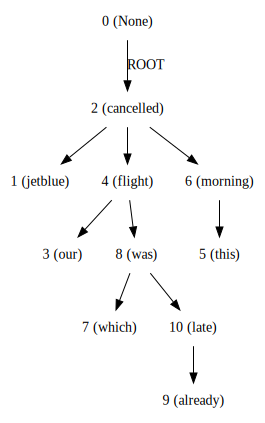

In [ ]:
tr

In [ ]:
# can projective dependency parser parse the same sentence?
tree = pdp.parse("jetblue cancelled our flight this morning which was already late")
for t in tree:
  print(t)

##### using Treebank data

In [ ]:
nltk.download('dependency_treebank')

[nltk_data] Downloading package dependency_treebank to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package dependency_treebank is already up-to-date!


True

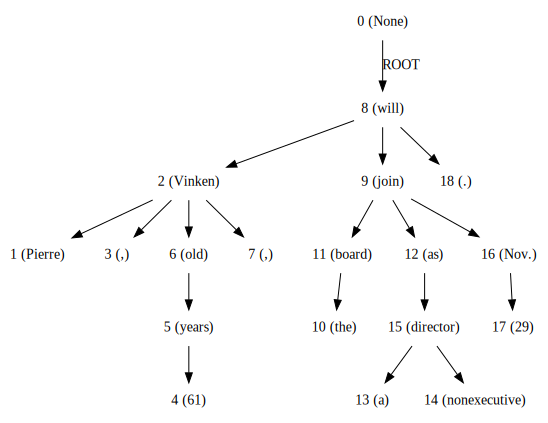

In [ ]:
treebank_example = nltk.corpus.dependency_treebank.parsed_sents()[0]
treebank_example

In [ ]:
# fields are word | tag | head | relation
treebank_data = """
Pierre  NNP     2       NMOD
Vinken  NNP     8       SUB
,       ,       2       P
61      CD      5       NMOD
years   NNS     6       AMOD
old     JJ      2       NMOD
,       ,       2       P
will    MD      0       ROOT
join    VB      8       VC
the     DT      11      NMOD
board   NN      9       OBJ
as      IN      9       VMOD
a       DT      15      NMOD
nonexecutive    JJ      15      NMOD
director        NN      12      PMOD
Nov.    NNP     9       VMOD
29      CD      16      NMOD
.       .       9       VMOD
"""

In [ ]:
dg = DependencyGraph(treebank_data)
dg.tree().pprint()

(will
  (Vinken Pierre , (old (years 61)) ,)
  (join (board the) (as (director a nonexecutive)) (Nov. 29) .))


Useful links:

[Lark parser](https://lark-parser.readthedocs.io/en/latest/parsers.html)

### using spaCy

In [ ]:
# import spacy
# nlp = spacy.load("en_core_web_sm")
# from spacy import displacy

In [ ]:
doc = nlp("My brother’s dog barks a lot")
displacy.render(doc,style='dep',jupyter=True, options={'distance': 150})

In [ ]:
# doc = nlp("Cats hate water")
# displacy.render(doc,style='dep',jupyter=True, options={'distance': 100})
# for token in doc:
#     print(token.text,"\t", token.dep_,"\t\t","Head of this token is :", token.head.text)

Cats 	 nsubj 		 Head of this token is : hate
hate 	 ROOT 		 Head of this token is : hate
water 	 dobj 		 Head of this token is : hate


In [ ]:
doc = nlp("Children had fruits , snacks and cookies")
displacy.render(doc,style='dep',jupyter=True, options={'distance': 100})
for token in doc:
    print("{0}({1}-{2}, {3}-{4})".format(token.dep_, token.head.text, token.head.i+1, token.text,  token.i+1, ))

nsubj(had-2, Children-1)
ROOT(had-2, had-2)
dobj(had-2, fruits-3)
punct(fruits-3, ,-4)
conj(fruits-3, snacks-5)
cc(snacks-5, and-6)
conj(snacks-5, cookies-7)


In [ ]:
token_array = [token for token in doc]
print("for the token 'Snacks', n_lefts = ",token_array[4].n_lefts," n_rights = ",token_array[4].n_rights)
print("for the token 'had', n_lefts = ",token_array[1].n_lefts," n_rights = ",token_array[1].n_rights)

for the token 'Snacks', n_lefts =  0  n_rights =  2
for the token 'had', n_lefts =  1  n_rights =  1


In [ ]:
print("Is 'had' the ancestor of 'fruits'? ",token_array[1].is_ancestor(token_array[2]))


Is 'had' the ancestor of 'fruits'?  True


In [ ]:
# ambiguous sentence
doc = nlp("the man saw a dog in the park with a telescope")
displacy.render(doc,style='dep',jupyter=True, options={'distance': 100})

In [ ]:
# long range dependency example
doc = nlp("The city council refused permission to the protesters because they feared violence")
displacy.render(doc,style='dep',jupyter=True, options={'distance': 100})

[Parsing English in 500 Lines of Python](https://explosion.ai/blog/parsing-english-in-python) is by MATTHEW HONNIBAL, who wrote spaCy.

## demos

**This notebook might not work well with Colab, as Colab doesn't support interactive screens out of the box. This should be run  locally**

In [ ]:
import nltk
from nltk.app import rdparser_app,srparser_app

The **recursive descent parser** maintains a tree, which records the structure of the portion of the text that has been parsed. It uses CFG productions to expand the fringe of the tree, and matches its leaves against the text. 

Initially, the tree contains the start symbol (“S”). It is shown in the main canvas, to the right of the list of available expansions.

The parser builds up a tree structure for the text using three operations: **Expand, Match and Backtrack**

In [ ]:
rdparser_app.app()

The **shift-reduce parser** maintains a stack, which records the structure of the portion of the text that has been parsed. The stack is initially empty. Its contents are shown on the left side of the main canvas.

On the right side of the main canvas is the remaining text. This is the portion of the text which has not yet been considered by the parser.

The parser builds up a tree structure for the text using two operations: **Shift and Reduce**

In [ ]:
srparser_app.app()